In [702]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [703]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')
# os.chdir('C:\\Users\\gratten\\Documents\\python\\projects\\data_cleanse')

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from prep import filterx
from prep import sort
from plot import bar
from utility import generate

In [704]:
fileName = 'filelist_9_08'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [705]:
df = filterx.sld(df_og)

In [706]:
df_drw = filterx.drw(df_og)

In [707]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [708]:
dups = dups.reset_index()

In [709]:
dups.head()

,index,Name,Format,size,modified,created,path,name_low
0,216426,0000F1012000.SLDPRT,SLDPRT,"50,623",08/06/2019 09:21:20,06/28/2019 15:09:03,R:\Doc\SolidWorks\SR TOOLING,0000f1012000.sldprt
1,102247,0000F1012000.SLDPRT,SLDPRT,"148,480",08/03/2015 08:19:36,02/21/2016 23:49:10,R:\Doc\SolidWorks\K23130 SEE'S CANDIES_KFWD SI...,0000f1012000.sldprt
2,29304,0000F1012000.SLDPRT,SLDPRT,"48,525",11/29/2016 14:54:18,02/21/2016 22:58:32,R:\Doc\SolidWorks\HEAD STD PARTS,0000f1012000.sldprt
3,117498,073935.SLDPRT,SLDPRT,"79,034",06/03/2020 11:36:03,06/03/2020 11:31:54,R:\Doc\SolidWorks\K23693 - Bimbo FHA SR4WD\UPD...,073935.sldprt
4,216548,073935.SLDPRT,SLDPRT,"67,937",11/28/2014 21:39:08,02/22/2016 01:11:34,R:\Doc\SolidWorks\SR TOOLING,073935.sldprt


In [710]:
top_offenders = dups['path'].value_counts().index.to_list()

In [711]:
def build_data(dups, num):
    directory = top_offenders[num]
    
    file_list = []
    for i in range(len(dups['path'])):
        if dups['path'][i] == top_offenders[num]:
            file_list.append(dups['name_low'].iloc[i])
            
    file_paths = {}
    for file in file_list:
        dups_trimmed = dups[(dups['name_low'] == file)]
        path_list = []
        for path in dups_trimmed['path']:
            path_list.append(path)
        file_paths[file] = path_list
        
    totalFiles = 0
    for k, v in file_paths.items():
        totalFiles += len(v)
    
    occur_list = []
    for k, v in file_paths.items():
        if len(v) not in occur_list:
            occur_list.append(len(v))
    
    occur_dict = {}
    for i in occur_list:
        occur_dict[i] = 0
        for v in file_paths.values():
            if i == len(v):
                occur_dict[i] += 1
                
    num_list = []
    occur_list = []
    for i in range(len(occur_dict)):
        key = min(occur_dict.keys())
        num_list.append(key)
        value = occur_dict.pop(key)
        occur_list.append(value)    
        
#     print(totalFiles)
        
    return num_list, occur_list, totalFiles, file_paths

In [712]:
def build_data2(offender, file_paths, quant):
    
    file_paths_trimmed = {}
    for k, v in file_paths.items():
        if offender in v:
            if len(v) == quant: 
                file_paths_trimmed[k] = v
                
    path_list = []
    for v in file_paths_trimmed.values():
        for i in v:
            path_list.append(i)
            
    path_list = pd.Series(path_list)
    
    occurence_list = path_list.value_counts().to_list()
    
    path_list = path_list.value_counts().index.to_list()
    
    return occurence_list, path_list, file_paths_trimmed

In [713]:
def chart_em(num_list, occur_list, x):
    
    df = pd.DataFrame({'other paths':num_list, 'occurences':occur_list})
    title = f'{top_offenders[i]}\nTotal files: {totalFiles_list[i]}\n Chart {x}'
    ax = df.plot.bar(x='other paths', y='occurences', rot=0, figsize=(10, 5), title = title)

In [715]:
def chart_em3(list1, list2, list3):
    df = pd.DataFrame({'files':list1, 'drawings':list2}, index=list3)
#     title = f'{titleA}'
#     ax = df.plot.barh(x='other paths', y='files', rot=0, figsize=(3, 7))
    ax = df.plot.barh(figsize=(5, 10))

In [716]:
############################################
# limit for how many charts to generate
############################################
my_range = 20

num_list_list = []
occur_list_list = []
totalFiles_list = []
file_paths_list = []

for i in range(my_range):
    outputA, outputB, totalFiles, file_paths = build_data(dups, i)
    num_list_list.append(outputA)
    occur_list_list.append(outputB)
    totalFiles_list.append(totalFiles)
    file_paths_list.append(file_paths)

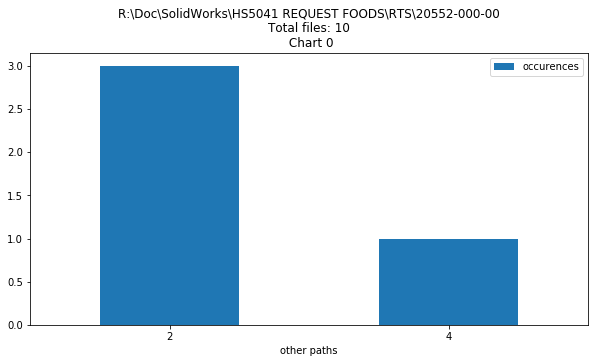

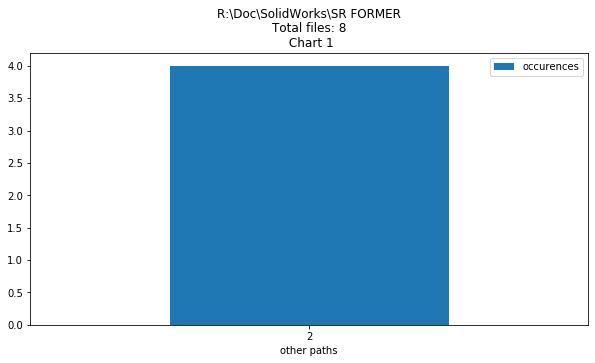

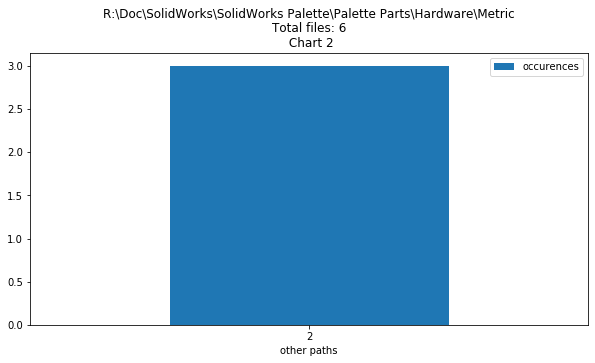

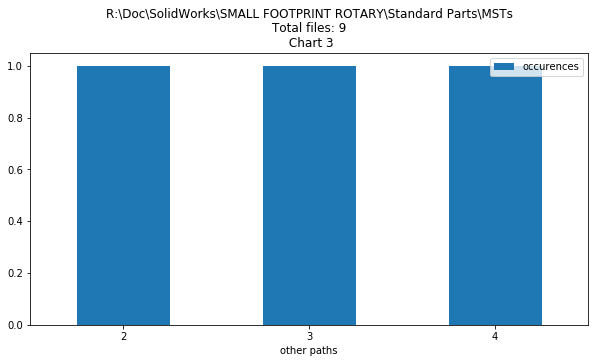

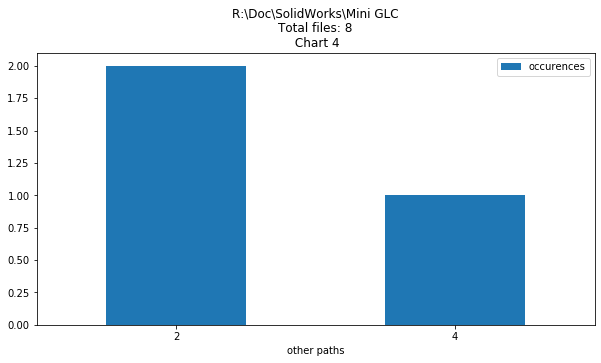

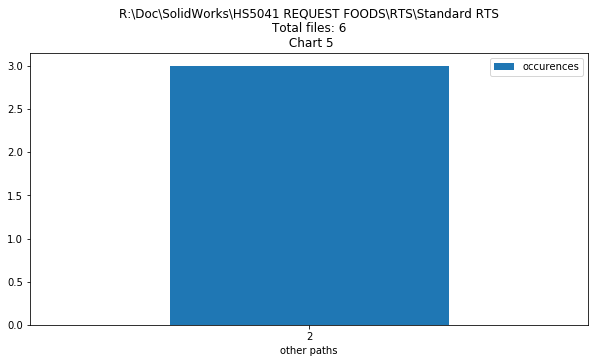

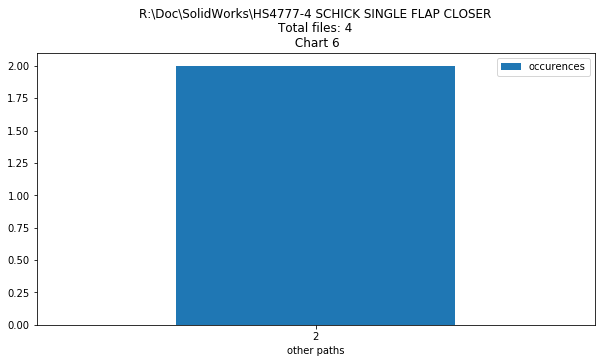

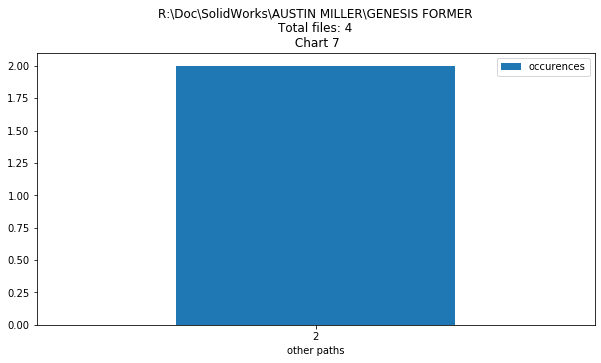

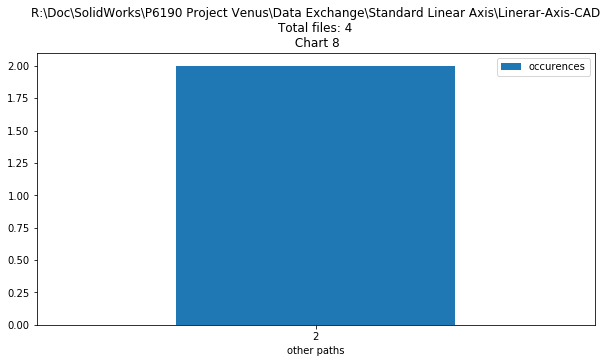

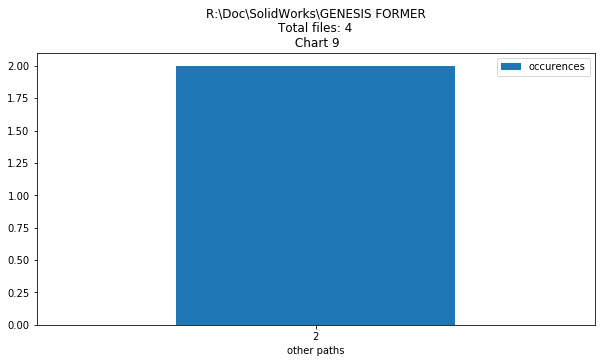

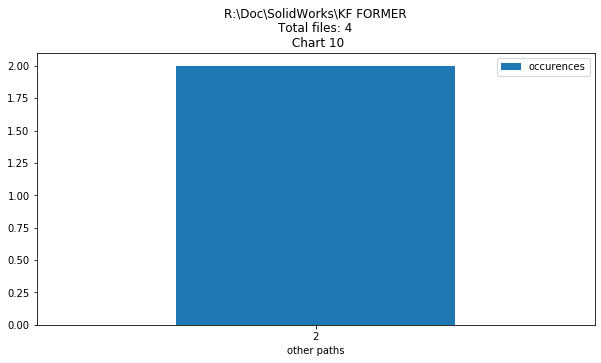

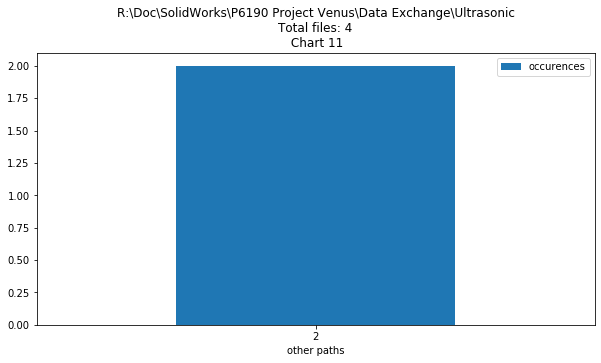

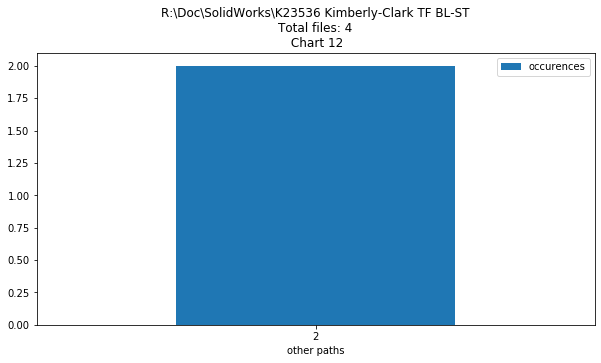

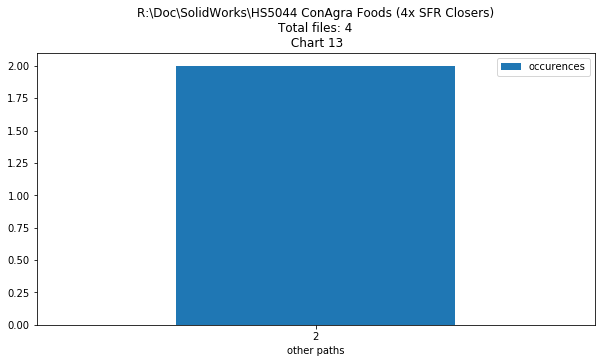

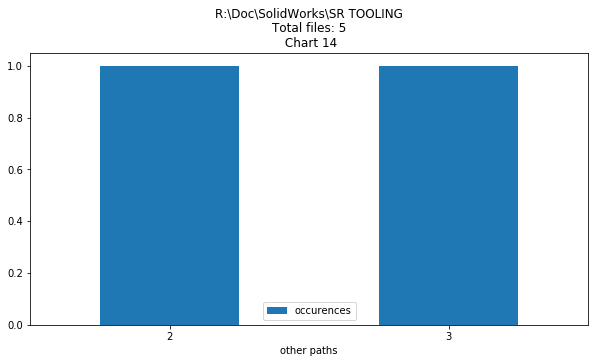

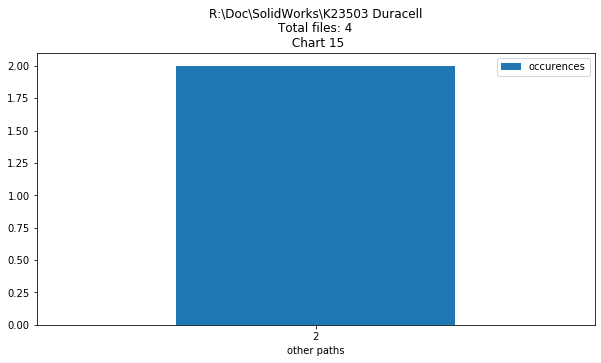

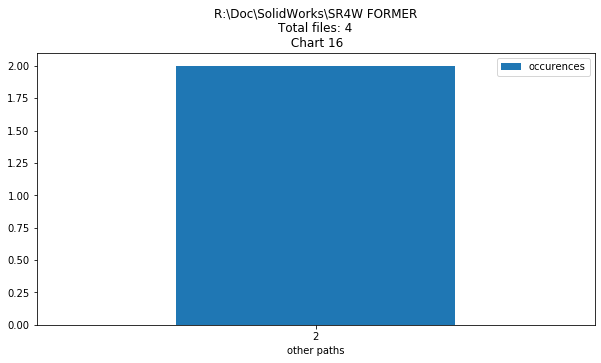

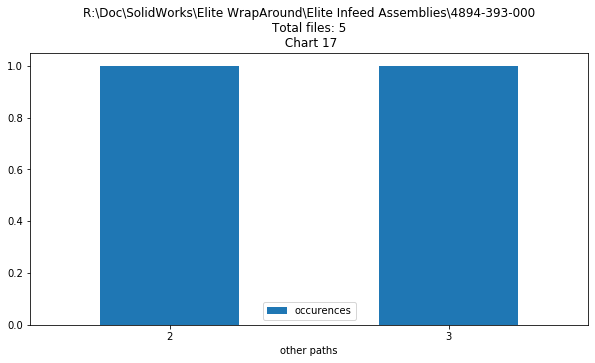

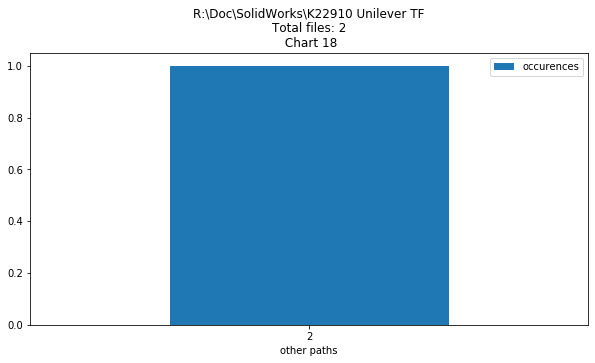

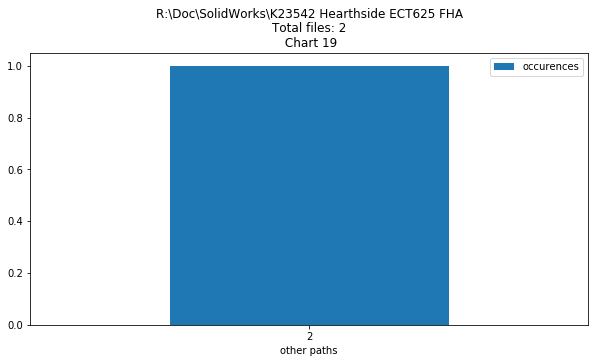

In [717]:
for i in range(len(num_list_list)):
    chart_em(num_list_list[i], occur_list_list[i], i)

In [718]:
############################################
# choose chart num and column for file list
############################################
chart_num = 2
quant = 2

In [719]:
occurence_list, path_list, file_paths_trimmed = build_data2(top_offenders[chart_num], file_paths_list[chart_num], quant)

In [720]:
# adding drawing functionality
drw_list = []
for k in file_paths_trimmed.keys():
    drw = k.split('.', 1)[0]
    drw = drw + '.slddrw'
    drw_list.append(drw)

In [721]:
df_drw_trimmed = df_drw[df_drw['Name'].isin(drw_list)]

In [722]:
drw_dict = {}
for i in path_list:
    if i in df_drw_trimmed['path'].value_counts().index.to_list():
        drw_dict[i] = df_drw_trimmed['path'].value_counts()[i]

In [723]:
drw_occurence_list = []
for i in path_list:
    if i in drw_dict.keys():
        drw_occurence_list.append(drw_dict[i])
    else:
        drw_occurence_list.append(0)

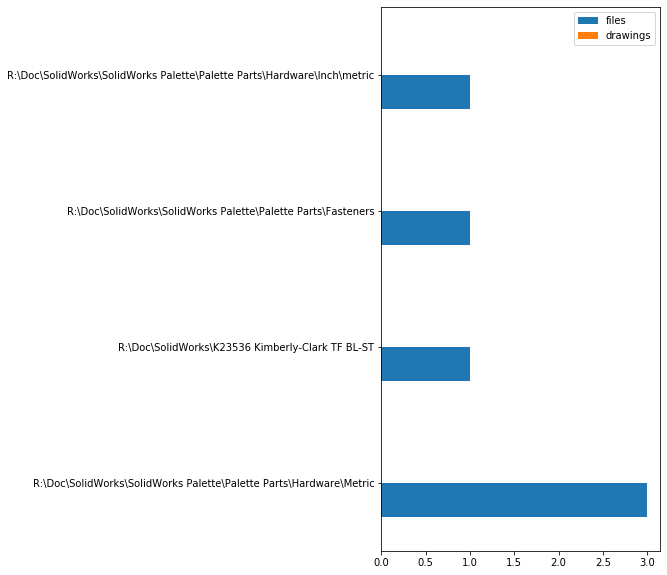

In [724]:
chart_em3(occurence_list, drw_occurence_list, path_list)

In [725]:
# for i in path_list:
#     print(i)

In [726]:
############################################
# choose path to maintain, all others will be deleted
############################################
choose_path2 = 0
               
file_list = []
for i in range(len(path_list)):
    if path_list[i] != path_list[choose_path2]:
        if drw_occurence_list[i] == 0:
            for k, v in file_paths_trimmed.items():
                if path_list[i] in v:
                    file_and_path = path_list[i] + '\\' + k
                    file_list.append(file_and_path)
                
###GENERATE BATCH FILE###
output_fname = '9_04_files_to_remove'
# generate.batch2(output_fname, file_list)

In [727]:
# for i in path_list:
#     print(i)

In [728]:
# SORT BY FILES SIZE
file_list = []
for k in file_paths_trimmed.keys():
    file_list.append(k)

In [729]:
dups_trimmed = dups[dups['name_low'].isin(file_list)]

In [730]:
for i in range(len(dups_trimmed['size'])):    
    value1 = dups_trimmed['size'].iloc[i]
    value1 = value1.replace(',','')
    value1 = int(value1)
    dups_trimmed['size'].iloc[i] = value1

In [731]:
dups_trimmed = dups_trimmed.sort_values(by=['size'], ascending=False)

In [732]:
dups_trimmed.reset_index(inplace=True, drop=True)

In [733]:
for i in dups_trimmed['name_low'].unique():
    print(i)

bolt hex.sldprt
nut.sldprt
m6 soc set scr.sldprt
